In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

C:\Users\acer\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
boston = pd.read_csv('LR_SR.csv')

In [3]:
boston.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
boston[pd.isnull(boston['y'])]

,x,y
213,3530.157369,NaN


In [6]:
boston = boston.dropna()

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


<AxesSubplot:xlabel='x', ylabel='y'>

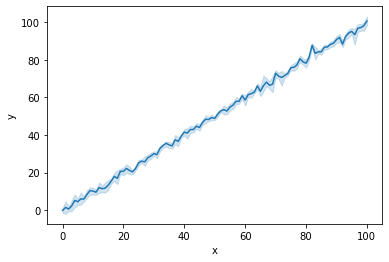

In [8]:
sns.lineplot(data=boston, x='x', y='y')

# Building ML Model

In [9]:
y = boston['y']
boston.drop(columns='y', inplace=True, axis=1 )

In [10]:
X_train, X_test, y_train, y_test = train_test_split(boston, y, test_size=0.2, shuffle=True, random_state=69)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

In [22]:
# Regression Metrics:
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

RMSE:  2.6799109790621842
MAE:  2.1416519692329294
R2 Score:  0.9903541101418469


In [17]:
# Difference Between Mean:
print('Original Mean: ', y_test.mean())
print('Predicted Mean: ', y_pred.mean())

Original Mean:  50.45096619530714
Predicted Mean:  50.73333959075818


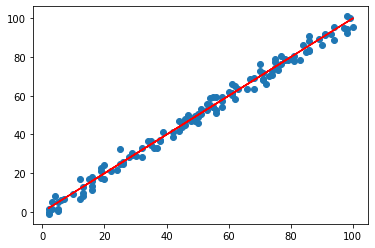

In [26]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, color='r')
plt.show()

In [37]:
c=model.intercept_
m = model.coef_
print('Intercept: ', c)
print('Coefficient: ', m)
print(f'Equation of line: y = {m}x {c}')

Intercept:  -0.10089489181050482
Coefficient:  [1.00165979]
Equation of line: y = [1.00165979]x -0.10089489181050482
